# PROBLEM STATEMENT AND BUSINESS CASE
Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:
0 => T-shirt/top 1 => Trouser 2 => Pullover 3 => Dress 4 => Coat 5 => Sandal 6 => Shirt 7 => Sneaker 8 => Bag 9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.



In [1]:
# importing libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep = ',')

In [4]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [5]:
fashion_train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [6]:
fashion_test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [7]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [11]:
fashion_train_df.shape

(60000, 785)

In [12]:
fashion_test_df.shape

(10000, 785)

In [13]:
training = np.array(fashion_train_df, dtype = 'float32')

In [14]:
testing = np.array(fashion_test_df, dtype = 'float32')

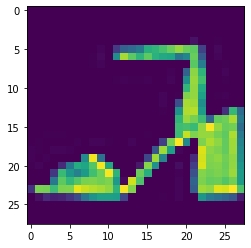

In [15]:
plt.imshow(training[60, 1:].reshape(28, 28))

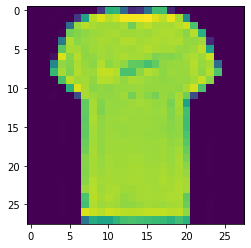

In [16]:
plt.imshow(training[10, 1:].reshape(28, 28))

0.0

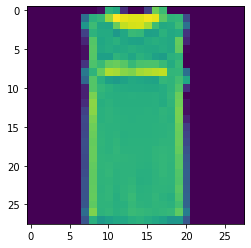

In [17]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
label

# Convolutional Neural Networks (feature detector)
use kernel matrix to scan given image and apply filter to obtain certain effect
image kernel is a  matrix used to apply effects such as blurring and sharpening
kernels are used in ML for feature extraction to sleect most important pixels of image
convolution preserves spatial relationship between pixels

# relu layers addsnon linearity in feature map
it also enhances sparsity or how scattered feature map is

# the gradient of relu does not vanish as we increase x compared to sigmoid fucntion

# max pooling/ flattening- reduce feature map dimensionality

# Lets train the model,

In [18]:
X_train = training[:, 1:] / 255
Y_train = training[:, 0] 

In [19]:
X_test = testing[:, 1:] / 255
Y_test  =  testing[:, 0]

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_validate, Y_train, Y_validate = train_test_split (X_train, Y_train, test_size = 0.2, random_state = 12345)

In [22]:
X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [23]:
X_train.shape

(48000, 28, 28, 1)

In [24]:
X_test.shape

(10000, 28, 28, 1)

In [25]:
X_validate.shape

(12000, 28, 28, 1)

In [26]:
import keras

Using TensorFlow backend.


In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [28]:
cnn_model = Sequential()

W0906 12:51:22.378962 20688 deprecation_wrapper.py:119] From C:\anac\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [29]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

C:\anac\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.
W0906 12:51:23.794442 20688 deprecation_wrapper.py:119] From C:\anac\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 12:51:23.804687 20688 deprecation_wrapper.py:119] From C:\anac\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [30]:
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

W0906 12:51:26.116843 20688 deprecation_wrapper.py:119] From C:\anac\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [31]:
cnn_model.add(Flatten())

In [32]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

C:\anac\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [33]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\anac\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [34]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

W0906 12:51:29.097556 20688 deprecation_wrapper.py:119] From C:\anac\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0906 12:51:29.118854 20688 deprecation_wrapper.py:119] From C:\anac\lib\site-packages\keras\backend\tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [35]:
epochs = 50

In [36]:
cnn_model.fit(X_train, Y_train, batch_size = 512, nb_epoch = epochs, verbose = 1, validation_data = (X_validate, Y_validate))

C:\anac\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0906 12:51:31.130449 20688 deprecation.py:323] From C:\anac\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0906 12:51:31.222717 20688 deprecation_wrapper.py:119] From C:\anac\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 24s 498us/step - loss: 1.0179 - acc: 0.6844 - val_loss: 0.5068 - val_acc: 0.8251
Epoch 2/50
48000/48000 [==============================] - 21s 440us/step - loss: 0.4662 - acc: 0.8374 - val_loss: 0.4178 - val_acc: 0.8568
Epoch 3/50
48000/48000 [==============================] - 22s 459us/step - loss: 0.4016 - acc: 0.8595 - val_loss: 0.3814 - val_acc: 0.8688
Epoch 4/50
48000/48000 [==============================] - 22s 454us/step - loss: 0.3741 - acc: 0.8700 - val_loss: 0.3565 - val_acc: 0.8788
Epoch 5/50
48000/48000 [==============================] - 22s 460us/step - loss: 0.3503 - acc: 0.8776 - val_loss: 0.3423 - val_acc: 0.8840
Epoch 6/50
48000/48000 [==============================] - 22s 459us/step - loss: 0.3334 - acc: 0.8841 - val_loss: 0.3252 - val_acc: 0.8876
Epoch 7/50
48000/48000 [==============================] - 22s 453us/step - loss: 0.3185 - acc: 0.8889 - val_loss: 0.

# evaluating model

In [37]:
evaluation = cnn_model.evaluate(X_test, Y_test)
print('Test Accuracy:{:3f}'.format(evaluation[1]))

10000/10000 [==============================] - 6s 631us/step
Test Accuracy:0.912600


In [39]:
predicted_classes = cnn_model.predict_classes(X_test)

In [40]:
predicted_classes

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

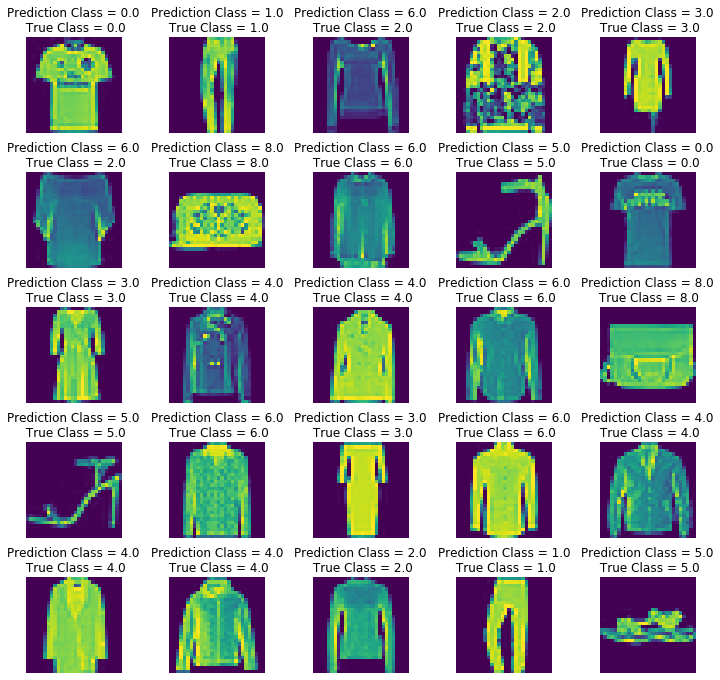

In [49]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel() 

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], Y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)

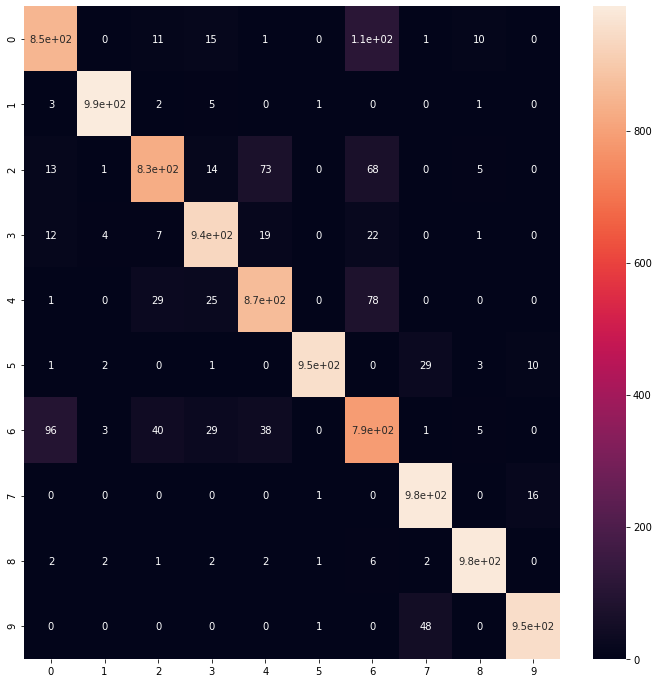

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predicted_classes)
plt.figure(figsize = (12, 12))
sns.heatmap(cm ,annot = True)


In [52]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["class {}".format(i) for i in range(num_classes)]
print(classification_report(Y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.87      0.85      0.86      1000
     class 1       0.99      0.99      0.99      1000
     class 2       0.90      0.83      0.86      1000
     class 3       0.91      0.94      0.92      1000
     class 4       0.87      0.87      0.87      1000
     class 5       1.00      0.95      0.97      1000
     class 6       0.74      0.79      0.76      1000
     class 7       0.92      0.98      0.95      1000
     class 8       0.98      0.98      0.98      1000
     class 9       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Improving Model

# improve accuracy by adding more feature detectors/filters or adding a dropout

dropout refers to dropping out of units
neurons develop co-dependancy among each other during training
dropout is a regulariztaion technique to avoid over fitting model
it enables training to occur on several architectures of neural network